In [12]:
# import relevant libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

from matplotlib.dates import DateFormatter
import calendar
import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp
from datetime import datetime

In [2]:
# import dataset
data = pd.read_csv('../Data/Datasets/cleandate_weekly_reval.csv')

In [3]:
data.head()

,Unnamed: 0,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id
0,0,2014-07-06,470,100.000000,2014,7,27,2014-27
1,1,2015-11-08,406,86.382979,2015,11,45,2015-45
2,2,2020-04-19,403,85.744681,2020,4,16,2020-16
3,3,2013-07-07,399,84.893617,2013,7,27,2013-27
4,4,2012-07-08,339,72.127660,2012,7,27,2012-27


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       766 non-null    int64  
 1   startdateweek    766 non-null    object 
 2   weekly_ufocount  766 non-null    int64  
 3   rel_val_alltime  766 non-null    float64
 4   year             766 non-null    int64  
 5   month            766 non-null    int64  
 6   weeknum          766 non-null    int64  
 7   week_id          766 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 48.0+ KB


In [37]:
# sort to have a proper timeline
data = data.sort_values('startdateweek')
data.head()

,Unnamed: 0,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id,t
763,763,2006-01-08,3,0.638298,2006,1,1,2006-1,1
758,758,2006-01-15,8,1.702128,2006,1,2,2006-2,2
759,759,2006-01-22,6,1.276596,2006,1,3,2006-3,3
757,757,2006-01-29,8,1.702128,2006,1,4,2006-4,4
764,764,2006-02-05,2,0.425532,2006,2,5,2006-5,5


In [71]:
# transform 'startweekdate' from an object to datetime and set it as index
data['startdateweek'] = pd.to_datetime(data['startdateweek'])
data.index = pd.DatetimeIndex(data['startdateweek'], freq='W')

In [88]:
data.head()

,Unnamed: 0,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id,t
startdateweek,,,,,,,,,
2006-01-08,763,2006-01-08,3,0.638298,2006,1,1,2006-1,1
2006-01-15,758,2006-01-15,8,1.702128,2006,1,2,2006-2,2
2006-01-22,759,2006-01-22,6,1.276596,2006,1,3,2006-3,3
2006-01-29,757,2006-01-29,8,1.702128,2006,1,4,2006-4,4
2006-02-05,764,2006-02-05,2,0.425532,2006,2,5,2006-5,5


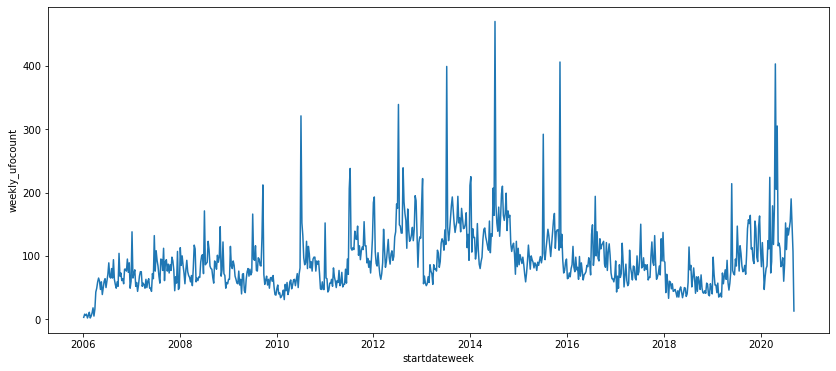

In [89]:
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=data,
             x=data.index,
             y="weekly_ufocount",
             ax=ax);

In [90]:
# to have numeric data to run regression
data = data.assign(t = (range(1 ,len(data)+1)))
data.head()

,Unnamed: 0,startdateweek,weekly_ufocount,rel_val_alltime,year,month,weeknum,week_id,t
startdateweek,,,,,,,,,
2006-01-08,763,2006-01-08,3,0.638298,2006,1,1,2006-1,1
2006-01-15,758,2006-01-15,8,1.702128,2006,1,2,2006-2,2
2006-01-22,759,2006-01-22,6,1.276596,2006,1,3,2006-3,3
2006-01-29,757,2006-01-29,8,1.702128,2006,1,4,2006-4,4
2006-02-05,764,2006-02-05,2,0.425532,2006,2,5,2006-5,5


In [74]:
# running a simple regression ufo count over time
df = pd.DataFrame({"y": data["weekly_ufocount"], "x": data["t"]})
df = sm.add_constant(df)

lin_reg = sm.OLS(df["y"], 
                  df[["const", "x"]]).fit()

lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.037
Method:                 Least Squares   F-statistic:                     30.21
Date:                Wed, 16 Sep 2020   Prob (F-statistic):           5.28e-08
Time:                        16:59:17   Log-Likelihood:                -4057.2
No. Observations:                 766   AIC:                             8118.
Df Residuals:                     764   BIC:                             8128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         76.8386      3.499     21.961      0.000      69.970      83.707
x              0.0434      0.008      5.497      0.000       0.028       0.059
==============================================================================
Omnibus:                      440.743   Durbin-Watson:                   0.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5001.894
Skew:                           2.386   Prob(JB):                         0.00
Kurtosis:                      14.574   Cond. No.                         886.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Only 3,7% of variation is explained by the regression model.

In [79]:
# create a baseline
df = df.assign(y_hat=lin_reg.predict(df[["const", "x"]]))
df

,const,y,x,y_hat
startdateweek,,,,
2006-01-08,1.0,3,1,76.882057
2006-01-15,1.0,8,2,76.925503
2006-01-22,1.0,6,3,76.968948
2006-01-29,1.0,8,4,77.012394
2006-02-05,1.0,2,5,77.055840
...,...,...,...,...
2020-08-09,1.0,154,762,109.944160
2020-08-16,1.0,190,763,109.987606
2020-08-23,1.0,147,764,110.031052


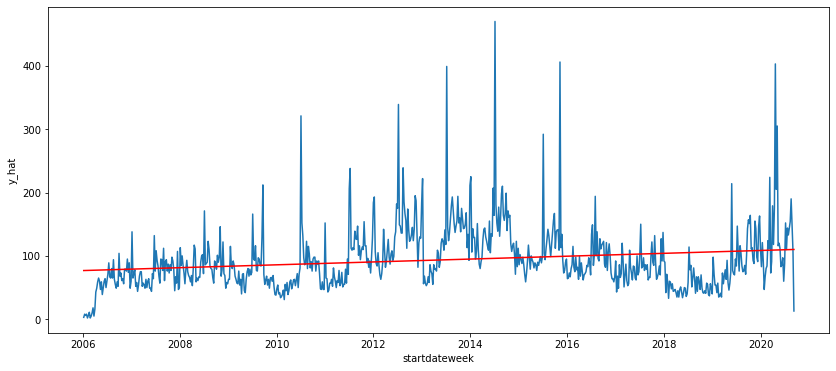

In [94]:
# visualization of baseline and actual data
fig, ax = plt.subplots(figsize=(14,6))
sns.lineplot(data=df,
             x=df.index,
             y="y",
             ax=ax);

sns.lineplot(data=df,
             x=df.index,
             y="y_hat",
             color="red",
             ax=ax);

We can see from the plots above that the red regression line can only reflect a very small amount os the actual fluctuation. Real data (blue) fluctuate with several enormous peaks. The regression model is not a good git to predict or even to reflect to real data. 